In [1]:
#Pkg.add("LowRankModels")
#Pkg.add("Plots")
#Pkg.update()

In [2]:
using Convex
using ECOS
set_default_solver(ECOSSolver(verbose=0))
using DataFrames
#using ScikitLearn
#using ScikitLearn.CrossValidation: train_test_split

In [3]:
using Plots

### Reading data

In [4]:
data = readtable("C:/Users/dbcar/Desktop/MessyData Project/FinalDataSet/Train1.csv");
data2 = readtable("C:/Users/dbcar/Desktop/MessyData Project/FinalDataSet/Train2.csv");

In [5]:
n = size(data,1)
y = data[:GRADE].data

X1 = [data[:FOOD].data data[:SERVICE].data data[:VALUE].data ones(n)]
X2 = [data[:VALUE].data  data[:SERVICE].data  data[:FOOD].data  data[:NUMBER_OF_FOODS].data  data[:Lunch].data  data[:Dinner].data  data[:LateNight].data  data[:Breakfast].data  data[:Brunch].data  data[:Drinks].data  data[:Businessmeetings].data  data[:Romantic].data  data[:Specialoccasions].data  data[:Largegroups].data  data[:Familieswithchildren].data  data[:Kids].data  data[:Barscene].data  data[:Localcuisine].data  data[:Scenicview].data  data[:Reservations].data  data[:PrivateDining].data  data[:WheelchairAccessible].data  data[:ServesAlcohol].data  data[:Takeout].data  data[:Television].data  data[:FreeWifi].data  data[:Delivery].data  data[:AcceptsCreditCards].data  data[:OutdoorSeating].data  data[:Buffet].data  data[:ParkingAvailable].data  data[:Chelsea].data  data[:Midtown].data  data[:FlatironDistrict].data  data[:FinancialDistrict].data  data[:Harlem].data  data[:Manhattan].data  data[:GramercyPark].data  data[:GreenwichVillage].data  data[:Nolita].data  data[:TriBeCa].data  data[:Chinatown].data  data[:EastVillage].data  data[:UpperWestSide].data  data[:LowerEastSide].data  data[:UpperEastSide].data  data[:WestVillage].data  data[:SoHo].data  data[:LittleItaly].data ones(n)]
X3 = [data[:VALUE].data  data[:SERVICE].data  data[:FOOD].data  data[:NUMBER_OF_FOODS].data  data[:Lunch].data  data[:Dinner].data  data[:LateNight].data  data[:Breakfast].data  data[:Brunch].data  data[:Drinks].data  data[:Businessmeetings].data  data[:Romantic].data  data[:Specialoccasions].data  data[:Largegroups].data  data[:Familieswithchildren].data  data[:Kids].data  data[:Barscene].data  data[:Localcuisine].data  data[:Scenicview].data  data[:Reservations].data  data[:PrivateDining].data  data[:WheelchairAccessible].data  data[:ServesAlcohol].data  data[:Takeout].data  data[:Television].data  data[:FreeWifi].data  data[:Delivery].data  data[:AcceptsCreditCards].data  data[:OutdoorSeating].data  data[:Buffet].data  data[:ParkingAvailable].data  data[:Chelsea].data  data[:Midtown].data  data[:FlatironDistrict].data  data[:FinancialDistrict].data  data[:Harlem].data  data[:Manhattan].data  data[:GramercyPark].data  data[:GreenwichVillage].data  data[:Nolita].data  data[:TriBeCa].data  data[:Chinatown].data  data[:EastVillage].data  data[:UpperWestSide].data  data[:LowerEastSide].data  data[:UpperEastSide].data  data[:WestVillage].data  data[:SoHo].data  data[:LittleItaly].data  data[:Great].data  data[:Good].data  data[:Delicious].data  data[:Nice].data  data[:Service].data  data[:Wait].data  data[:TOPIC_1].data  data[:TOPIC_2].data  data[:TOPIC_3].data  data[:TOPIC_4].data  data[:TOPIC_5].data  data[:TOPIC_6].data  data[:TOPIC_7].data  data[:TOPIC_8].data  data[:TOPIC_9].data  data[:TOPIC_10].data  data[:TOPIC_11].data  data[:TOPIC_12].data  data[:TOPIC_13].data  data[:TOPIC_14].data  data[:TOPIC_15].data  data[:TOPIC_16].data  data[:TOPIC_17].data  data[:TOPIC_18].data  data[:TOPIC_19].data  data[:TOPIC_20].data  data[:TOPIC_21].data  data[:TOPIC_22].data  data[:TOPIC_23].data  data[:TOPIC_24].data  data[:TOPIC_25].data  data[:TOPIC_26].data  data[:TOPIC_27].data  data[:TOPIC_28].data  data[:TOPIC_29].data  data[:TOPIC_30].data  data[:CLUSTER_KMEANS].data ones(n)]
X4 = [data[:NUMBER_OF_FOODS].data  data[:Lunch].data  data[:Dinner].data  data[:LateNight].data  data[:Breakfast].data  data[:Brunch].data  data[:Drinks].data  data[:Businessmeetings].data  data[:Romantic].data  data[:Specialoccasions].data  data[:Largegroups].data  data[:Familieswithchildren].data  data[:Kids].data  data[:Barscene].data  data[:Localcuisine].data  data[:Scenicview].data  data[:Reservations].data  data[:PrivateDining].data  data[:WheelchairAccessible].data  data[:ServesAlcohol].data  data[:Takeout].data  data[:Television].data  data[:FreeWifi].data  data[:Delivery].data  data[:AcceptsCreditCards].data  data[:OutdoorSeating].data  data[:Buffet].data  data[:ParkingAvailable].data  data[:Chelsea].data  data[:Midtown].data  data[:FlatironDistrict].data  data[:FinancialDistrict].data  data[:Harlem].data  data[:Manhattan].data  data[:GramercyPark].data  data[:GreenwichVillage].data  data[:Nolita].data  data[:TriBeCa].data  data[:Chinatown].data  data[:EastVillage].data  data[:UpperWestSide].data  data[:LowerEastSide].data  data[:UpperEastSide].data  data[:WestVillage].data  data[:SoHo].data  data[:LittleItaly].data  data[:Great].data  data[:Good].data  data[:Delicious].data  data[:Nice].data  data[:Service].data  data[:Wait].data  data[:TOPIC_1].data  data[:TOPIC_2].data  data[:TOPIC_3].data  data[:TOPIC_4].data  data[:TOPIC_5].data  data[:TOPIC_6].data  data[:TOPIC_7].data  data[:TOPIC_8].data  data[:TOPIC_9].data  data[:TOPIC_10].data  data[:TOPIC_11].data  data[:TOPIC_12].data  data[:TOPIC_13].data  data[:TOPIC_14].data  data[:TOPIC_15].data  data[:TOPIC_16].data  data[:TOPIC_17].data  data[:TOPIC_18].data  data[:TOPIC_19].data  data[:TOPIC_20].data  data[:TOPIC_21].data  data[:TOPIC_22].data  data[:TOPIC_23].data  data[:TOPIC_24].data  data[:TOPIC_25].data  data[:TOPIC_26].data  data[:TOPIC_27].data  data[:TOPIC_28].data  data[:TOPIC_29].data  data[:TOPIC_30].data  data[:CLUSTER_KMEANS].data ones(n)];

In [6]:
#Cross validation on train2
n2 = size(data2,1)
y2 = data2[:GRADE].data;

In [7]:
Xt1 = [data2[:FOOD].data data2[:SERVICE].data data2[:VALUE].data ones(n2)] 
Xt2 = [data2[:VALUE].data  data2[:SERVICE].data  data2[:FOOD].data  data2[:NUMBER_OF_FOODS].data  data2[:Lunch].data  data2[:Dinner].data  data2[:LateNight].data  data2[:Breakfast].data  data2[:Brunch].data  data2[:Drinks].data  data2[:Businessmeetings].data  data2[:Romantic].data  data2[:Specialoccasions].data  data2[:Largegroups].data  data2[:Familieswithchildren].data  data2[:Kids].data  data2[:Barscene].data  data2[:Localcuisine].data  data2[:Scenicview].data  data2[:Reservations].data  data2[:PrivateDining].data  data2[:WheelchairAccessible].data  data2[:ServesAlcohol].data  data2[:Takeout].data  data2[:Television].data  data2[:FreeWifi].data  data2[:Delivery].data  data2[:AcceptsCreditCards].data  data2[:OutdoorSeating].data  data2[:Buffet].data  data2[:ParkingAvailable].data  data2[:Chelsea].data  data2[:Midtown].data  data2[:FlatironDistrict].data  data2[:FinancialDistrict].data  data2[:Harlem].data  data2[:Manhattan].data  data2[:GramercyPark].data  data2[:GreenwichVillage].data  data2[:Nolita].data  data2[:TriBeCa].data  data2[:Chinatown].data  data2[:EastVillage].data  data2[:UpperWestSide].data  data2[:LowerEastSide].data  data2[:UpperEastSide].data  data2[:WestVillage].data  data2[:SoHo].data  data2[:LittleItaly].data ones(n2)] 
Xt3 = [data2[:VALUE].data  data2[:SERVICE].data  data2[:FOOD].data  data2[:NUMBER_OF_FOODS].data  data2[:Lunch].data  data2[:Dinner].data  data2[:LateNight].data  data2[:Breakfast].data  data2[:Brunch].data  data2[:Drinks].data  data2[:Businessmeetings].data  data2[:Romantic].data  data2[:Specialoccasions].data  data2[:Largegroups].data  data2[:Familieswithchildren].data  data2[:Kids].data  data2[:Barscene].data  data2[:Localcuisine].data  data2[:Scenicview].data  data2[:Reservations].data  data2[:PrivateDining].data  data2[:WheelchairAccessible].data  data2[:ServesAlcohol].data  data2[:Takeout].data  data2[:Television].data  data2[:FreeWifi].data  data2[:Delivery].data  data2[:AcceptsCreditCards].data  data2[:OutdoorSeating].data  data2[:Buffet].data  data2[:ParkingAvailable].data  data2[:Chelsea].data  data2[:Midtown].data  data2[:FlatironDistrict].data  data2[:FinancialDistrict].data  data2[:Harlem].data  data2[:Manhattan].data  data2[:GramercyPark].data  data2[:GreenwichVillage].data  data2[:Nolita].data  data2[:TriBeCa].data  data2[:Chinatown].data  data2[:EastVillage].data  data2[:UpperWestSide].data  data2[:LowerEastSide].data  data2[:UpperEastSide].data  data2[:WestVillage].data  data2[:SoHo].data  data2[:LittleItaly].data  data2[:Great].data  data2[:Good].data  data2[:Delicious].data  data2[:Nice].data  data2[:Service].data  data2[:Wait].data  data2[:TOPIC_1].data  data2[:TOPIC_2].data  data2[:TOPIC_3].data  data2[:TOPIC_4].data  data2[:TOPIC_5].data  data2[:TOPIC_6].data  data2[:TOPIC_7].data  data2[:TOPIC_8].data  data2[:TOPIC_9].data  data2[:TOPIC_10].data  data2[:TOPIC_11].data  data2[:TOPIC_12].data  data2[:TOPIC_13].data  data2[:TOPIC_14].data  data2[:TOPIC_15].data  data2[:TOPIC_16].data  data2[:TOPIC_17].data  data2[:TOPIC_18].data  data2[:TOPIC_19].data  data2[:TOPIC_20].data  data2[:TOPIC_21].data  data2[:TOPIC_22].data  data2[:TOPIC_23].data  data2[:TOPIC_24].data  data2[:TOPIC_25].data  data2[:TOPIC_26].data  data2[:TOPIC_27].data  data2[:TOPIC_28].data  data2[:TOPIC_29].data  data2[:TOPIC_30].data  data2[:CLUSTER_KMEANS].data ones(n2)] 
Xt4 = [data2[:NUMBER_OF_FOODS].data  data2[:Lunch].data  data2[:Dinner].data  data2[:LateNight].data  data2[:Breakfast].data  data2[:Brunch].data  data2[:Drinks].data  data2[:Businessmeetings].data  data2[:Romantic].data  data2[:Specialoccasions].data  data2[:Largegroups].data  data2[:Familieswithchildren].data  data2[:Kids].data  data2[:Barscene].data  data2[:Localcuisine].data  data2[:Scenicview].data  data2[:Reservations].data  data2[:PrivateDining].data  data2[:WheelchairAccessible].data  data2[:ServesAlcohol].data  data2[:Takeout].data  data2[:Television].data  data2[:FreeWifi].data  data2[:Delivery].data  data2[:AcceptsCreditCards].data  data2[:OutdoorSeating].data  data2[:Buffet].data  data2[:ParkingAvailable].data  data2[:Chelsea].data  data2[:Midtown].data  data2[:FlatironDistrict].data  data2[:FinancialDistrict].data  data2[:Harlem].data  data2[:Manhattan].data  data2[:GramercyPark].data  data2[:GreenwichVillage].data  data2[:Nolita].data  data2[:TriBeCa].data  data2[:Chinatown].data  data2[:EastVillage].data  data2[:UpperWestSide].data  data2[:LowerEastSide].data  data2[:UpperEastSide].data  data2[:WestVillage].data  data2[:SoHo].data  data2[:LittleItaly].data  data2[:Great].data  data2[:Good].data  data2[:Delicious].data  data2[:Nice].data  data2[:Service].data  data2[:Wait].data  data2[:TOPIC_1].data  data2[:TOPIC_2].data  data2[:TOPIC_3].data  data2[:TOPIC_4].data  data2[:TOPIC_5].data  data2[:TOPIC_6].data  data2[:TOPIC_7].data  data2[:TOPIC_8].data  data2[:TOPIC_9].data  data2[:TOPIC_10].data  data2[:TOPIC_11].data  data2[:TOPIC_12].data  data2[:TOPIC_13].data  data2[:TOPIC_14].data  data2[:TOPIC_15].data  data2[:TOPIC_16].data  data2[:TOPIC_17].data  data2[:TOPIC_18].data  data2[:TOPIC_19].data  data2[:TOPIC_20].data  data2[:TOPIC_21].data  data2[:TOPIC_22].data  data2[:TOPIC_23].data  data2[:TOPIC_24].data  data2[:TOPIC_25].data  data2[:TOPIC_26].data  data2[:TOPIC_27].data  data2[:TOPIC_28].data  data2[:TOPIC_29].data  data2[:TOPIC_30].data  data2[:CLUSTER_KMEANS].data ones(n2)];


In [38]:
#X_comb=[X1,X2,X3,X4];
#X_comb2=[Xt1,Xt2,Xt3,Xt4];
X_comb=[X3];
X_comb2=[Xt3];

### Models and cross-validation

### Base Line

In [9]:
wbase=mean(y)

3.564010263995097

In [10]:
mse_base=sum((y.-wbase).^2)/length(y)

1.0185706977497329

### Quadratic loss - no regularization

In [11]:
# Fitting models
a=1
error_quad_test=[]

for x in X_comb
    w1=x\y
    error1=sum((y2.-X_comb2[a]*w1).^2)/length(y2)
    w2=X_comb2[a]\y2
    error2=sum((y.-x*w2).^2)/length(y)
        
    push!(error_quad_test,mean([error1,error2]))
    a=a+1
        
end

In [12]:
mse_quad=minimum(error_quad_test)

0.9888484608272321

### l1 loss no regularization

In [13]:
# proximal gradient method
include("proxgrad.jl");

In [14]:
a=1
error_l1loss_test=[]

for x in X_comb
    w1 = proxgrad(1/n*L1Loss(), ZeroReg(), x, y,maxiters=5000)
    error1=sum((y2.-X_comb2[a]*w1).^2)/length(y2)
    w2 = proxgrad(1/n2*L1Loss(), ZeroReg(), X_comb2[a], y2,maxiters=5000)
    error2=sum((y.-x*w2).^2)/length(y)
    
    push!(error_l1loss_test,mean([error2,error1]))
    a=a+1 
    
end

N} where N where T})(Ptr{T}, Int64, Tuple{Vararg{Int64

In [15]:
mse_l1loss=minimum(error_l1loss_test)

, N}}) in module ArrayViews

0.9639893105501438

#### Ridge regression (Quadratic loss + quadratic regularizer)

In [16]:
function ridge_regression(X,y; λ=1)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y) + λ*sumsquares(w))
    solve!(p)
    return w.value
end

 at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\ArrayViews\src\arrviews.jl:18 overwritten

ridge_regression (generic function with 1 method)

In [17]:
# Fitting models
a=1
error_ridge_test=[]
la=[]
model=[]

for x in X_comb
    
    for l in 0.1:0.2:5
        #Fitting the model
        w1 = ridge_regression(x,y,λ=l);
        error1=sum((y2.-X_comb2[a]*w1).^2)/length(y2)
        w2 = ridge_regression(X_comb2[a],y2,λ=l);
        error2=sum((y.-x*w2).^2)/length(y)      
        
        push!(error_ridge_test,mean([error2,error1]))
        push!(la,l)
        push!(model,a)
    end
    a=a+1
end


 at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\ArrayViews\src\arrviews.jl:26.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at .\deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\constraints\soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\atoms/second_order_cone\qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\atoms/affine\add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\constraints\constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::

In [18]:
la[indmin(error_ridge_test)]

4.9

In [19]:
model[indmin(error_ridge_test)]

1

In [20]:
mse_ridge=minimum(error_ridge_test)

0.9159877750157115

#### Quadratic + lasso regularizer

In [21]:
function lasso(X,y; λ=1)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y) + λ*norm(w,1))
    solve!(p)
    return w.value
end

lasso (generic function with 1 method)

In [68]:
# Fitting models
a=1
error_lasso_test=[]
model=[]
la=[]

for x in X_comb
    for l in 0.1:0.2:15
        #Fitting the model
        w1 = lasso(x,y; λ=l)
        error1=sum((y2.-X_comb2[a]*w1).^2)/length(y2)
        w2 = lasso(X_comb2[a],y2; λ=l)
        error2=sum((y.-x*w2).^2)/length(y)
                
        push!(error_lasso_test,mean([error2,error1]))
        push!(la,l)
        push!(model,a)        
    end
    a=a+1 
end

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at .\deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\constraints\soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\atoms/second_order_cone\qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\atoms/affine\add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\constraints\constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\

In [69]:
la[indmin(error_lasso_test)]

9.7

In [70]:
model[indmin(error_lasso_test)]

1

In [71]:
mse_lasso=minimum(error_lasso_test)

0.09898354128523154


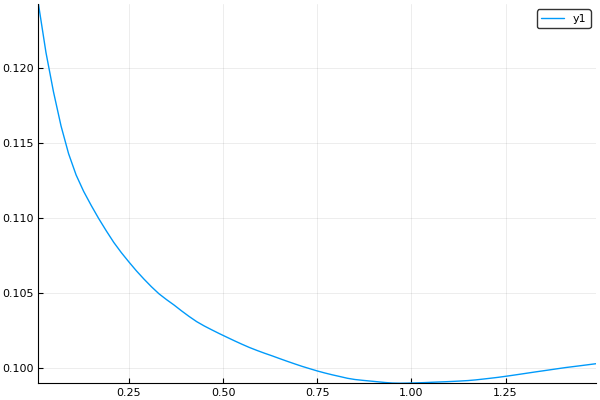

In [73]:
plot(la2,error_lasso_test)

In [27]:
w_final3 = lasso(X4,y; λ=4.9);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at .\deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\constraints\soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\atoms/second_order_cone\qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\atoms/affine\add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\src\constraints\constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\Convex\

#### L1 Loss + quadratic regularizer

In [75]:
a=1
error_l1quad_test=[]
model=[]
la=[]

for x in X_comb
    for l in 0.1:0.2:5
        #Fitting the model
        w1 = proxgrad(1/n*L1Loss(), QuadReg(l), x, y,maxiters=5000)
        error1=sum((y2.-X_comb2[a]*w1).^2)/length(y2)
        w2 = proxgrad(1/n2*L1Loss(), QuadReg(l), X_comb2[a], y2,maxiters=5000)
        error2=sum((y.-x*w2).^2)/length(y)
        
        push!(error_l1quad_test,mean([error2,error1]))
        push!(la,l)
        push!(model,a) 
    end
    a=a+1     
end

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] sumabs2(::Array{Float64,1}) at .\deprecated.jl:57
 [3] evaluate at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\LowRankModels\src\regularizers.jl:57 [inlined]
 [4] #proxgrad_linesearch#8(::Int64, ::Int64, ::Array{Float64,1}, ::LowRankModels.ConvergenceHistory, ::Function, ::LowRankModels.L1Loss, ::LowRankModels.QuadReg, ::Array{Float64,2}, ::Array{Float64,1}) at C:\Users\dbcar\Desktop\MessyData Project\proxgrad.jl:42
 [5] (::#kw##proxgrad_linesearch)(::Array{Any,1}, ::#proxgrad_linesearch, ::LowRankModels.L1Loss, ::LowRankModels.QuadReg, ::Array{Float64,2}, ::Array{Float64,1}) at .\<missing>:0
 [6] #proxgrad#7(::Array{Any,1}, ::Function, ::LowRankModels.L1Loss, ::LowRankModels.QuadReg, ::Vararg{Any,N} where N) at C:\Users\dbcar\Desktop\MessyData Project\proxgrad.jl:29
 [7] (::#kw##proxgrad)(::Array{Any,1}, ::#proxgrad, ::LowRankModels.L1Loss, ::LowRankModels.QuadReg, ::Vararg{Any,N} where N) at .

In [76]:
la[indmin(error_l1quad_test)]

0.1

In [77]:
model[indmin(error_l1quad_test)]

1

In [78]:
mse_l1quad=minimum(error_l1quad_test)

0.10606099598517013

#### L1 Loss + Lasso regularizer

In [46]:
a=1
error_l1lasso_test=[]
model=[]
la=[]

for x in X_comb
    for l in 0.1:0.05:1.5
        #Fitting the model
        w1 = proxgrad(1/n*L1Loss(), OneReg(l), x, y,maxiters=5000)
        error1=sum((y2.-X_comb2[a]*w1).^2)/length(y2)
        w2 = proxgrad(1/n2*L1Loss(), OneReg(l), X_comb2[a], y2,maxiters=5000)
        error2=sum((y.-x*w2).^2)/length(y)
                
        push!(error_l1lasso_test,mean([error2,error1]))
        push!(la,l)
        push!(model,a) 
    end
    a=a+1      
end

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] sumabs(::Array{Float64,1}) at .\deprecated.jl:57
 [3] evaluate at C:\Users\dbcar\AppData\Local\JuliaPro-0.6.1.1\pkgs-0.6.1.1\v0.6\LowRankModels\src\regularizers.jl:87 [inlined]
 [4] #proxgrad_linesearch#8(::Int64, ::Int64, ::Array{Float64,1}, ::LowRankModels.ConvergenceHistory, ::Function, ::LowRankModels.L1Loss, ::LowRankModels.OneReg, ::Array{Float64,2}, ::Array{Float64,1}) at C:\Users\dbcar\Desktop\MessyData Project\proxgrad.jl:42
 [5] (::#kw##proxgrad_linesearch)(::Array{Any,1}, ::#proxgrad_linesearch, ::LowRankModels.L1Loss, ::LowRankModels.OneReg, ::Array{Float64,2}, ::Array{Float64,1}) at .\<missing>:0
 [6] #proxgrad#7(::Array{Any,1}, ::Function, ::LowRankModels.L1Loss, ::LowRankModels.OneReg, ::Vararg{Any,N} where N) at C:\Users\dbcar\Desktop\MessyData Project\proxgrad.jl:29
 [7] (::#kw##proxgrad)(::Array{Any,1}, ::#proxgrad, ::LowRankModels.L1Loss, ::LowRankModels.OneReg, ::Vararg{Any,N} where N) at .\<mis

In [47]:
la[indmin(error_l1lasso_test)]

1.0

In [48]:
model[indmin(error_l1lasso_test)]

1

In [49]:
mse_l1lasso=minimum(error_l1lasso_test)

0.11726775472140674

In [50]:
indmin(error_l1lasso_test)


19


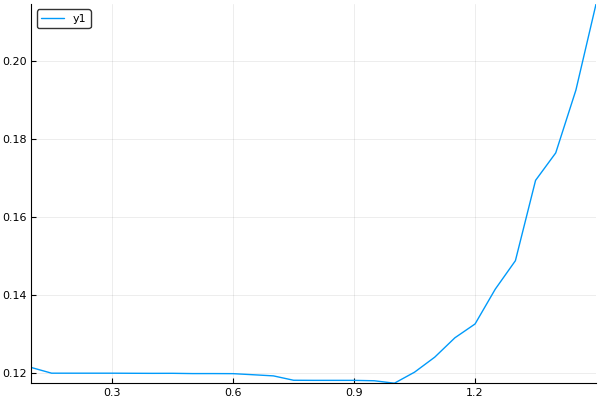

In [51]:
plot(la,error_l1lasso_test)

### Summary

In [37]:
#Training error
print("Baseline ", mse_base," Quadratic ", mse_quad, "  L1 ", mse_l1loss, "  Quadratic + QuadReg ", mse_ridge, 
      "  Quadratic + Lasso ", mse_lasso, "  L1 + QuadReg ", mse_l1quad, "  L1 + Lasso ", mse_l1lasso)

Baseline 1.0185706977497329 Quadratic 0.9888484608272321  L1 0.9639893105501438  Quadratic + QuadReg 0.9159877750157115  Quadratic + Lasso 0.8758360406063666  L1 + QuadReg 1.0024030363163168  L1 + Lasso 4.343774538112314